**Sales Analysis**

In [44]:
import pandas as pd 
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

**Merging 12 months of sales data into a single CSV file**

In [2]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')

files = [file for file in os.listdir('./Sales_Data')]

all_sales_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_sales_data = pd.concat([all_sales_data, df])
    
all_sales_data.to_csv('all_data.csv', index=False)

**Read Merged DataFrame**

In [3]:
sales_data = pd.read_csv('all_data.csv')

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [5]:
sales_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


**Data Cleaning**

In [6]:
#Drop NaN Rows
sales_data.dropna(inplace=True)

***Find 'Or' and delete***

In [7]:
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']

**Augment data with additional columns**

***Add Month Column***

In [8]:
sales_data['Month'] = sales_data['Order Date'].str[0:2]
#converting the data type of Month Column to an int
sales_data['Month'] = sales_data['Month'].astype('int32')

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Creating a new sales column(qty*price)

In [9]:
#change data type
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype('int32')
sales_data['Price Each'] = sales_data['Price Each'].astype('float')

sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [10]:
#Rearranging Columns

cols = list(sales_data.columns.values)
sales_data = sales_data[cols[0:4] + [cols[-1]] + [cols[4]] + [cols[-2]] + cols[5:6]]

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


In [22]:
#Agument the Purchase Address and create a new column with only city

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_data['City'] = sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")


sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


**Question 1: What was the best month for sales? How much was earned that month?**

In [11]:
monthly_sales = sales_data.groupby('Month').sum()

monthly_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


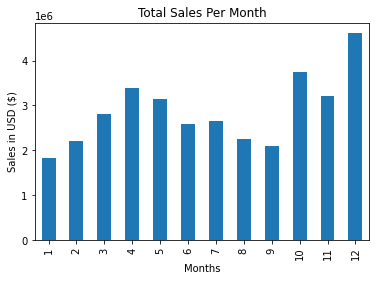

In [13]:
monthly_sales['Sales'].plot(kind='bar', title = 'Total Sales Per Month', ylabel='Sales in USD ($)', xlabel='Months')
plt.show()

*The company generated the highest revenue from sales of its products in December 2019 and the lowest revenue from sales in January 2019.*

**Question 2: What city had the highest amount of sales?**

In [23]:
sales_city = sales_data.groupby('City').sum()

sales_city

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


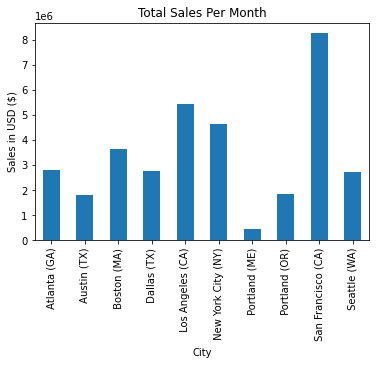

In [24]:
sales_city['Sales'].plot(kind='bar', title = 'Total Sales Per Month', ylabel='Sales in USD ($)', xlabel='City')
plt.show()

*San Francisco (CA)	has the highest amount of sales while Portland (ME)	has the lowest amount of sales*

**Question 3: What time should we display advertisements to increase he likelihood of customer's buying product?**

In [28]:
# converting Order Date column from string to datetime format 
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])

sales_data['Hour'] = sales_data['Order Date'].dt.hour
sales_data['Minute'] = sales_data['Order Date'].dt.minute

sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA),22,30
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),9,27


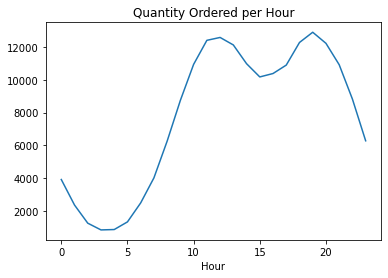

In [39]:
hours = sales_data.groupby('Hour').count()

hours['Quantity Ordered'].plot(kind='line', title = 'Quantity Ordered per Hour')

plt.show()

*My recommendation is around 11am or 7pm*

**Question 4: What products are often sold together?**

In [43]:
df =  sales_data[sales_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head(100)

C:\Users\Phillips Oki\AppData\Local\Temp\ipykernel_18828\2200180829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
2662,179108,"Lightning Charging Cable,AAA Batteries (4-pack)"
2683,179128,"iPhone,Apple Airpods Headphones"
2718,179162,"Google Phone,USB-C Charging Cable"
2783,179226,"34in Ultrawide Monitor,Macbook Pro Laptop"


In [46]:
# counting unique pairs of numbers into a python dictionary 

count = Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Question 5: What product sold the most and why?**

C:\Users\Phillips Oki\AppData\Local\Temp\ipykernel_18828\3498416941.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


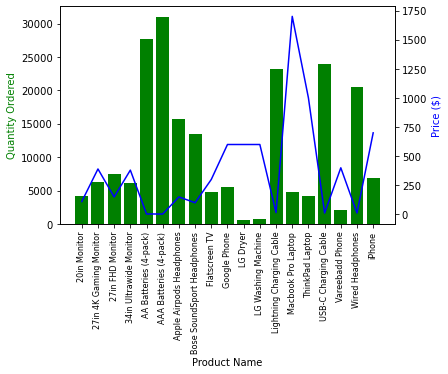

In [51]:
prices = sales_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()